# Misinterpreted Data Type

There are times when pandas misinterprets the data and may assign the wrong data type to the column. Usually this means that a numeric column has non-numeric values.

As part of the EDA process, we need to clean up the dataset.

There are 2 parts to this notebook:

* Identify and analyze the issue
* Fix the issue

In [18]:
# Install the packages

!pip install matplotlib pandas > /dev/null 2>&1

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


# Import the data
df = pd.read_csv('../../data/fortune500.csv')

print(df.dtypes)

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object


In [20]:
# Let's clean a bit to make the dataset easier for EDA.

# The column names are long, shorten them.
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
print(df.dtypes)

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object


## Identify and analyze the issue

Let us identify how many invalid data values in the imported dataset.

Sample rows where profit != numeric value
     year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.

# Rows where profit != numeric value: 369
% rows where profit != numeric value: 1.447


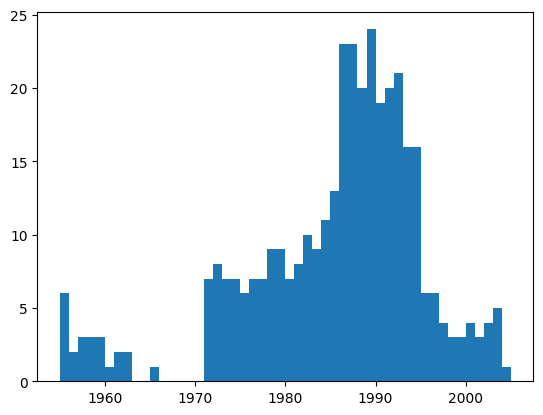

In [21]:
# ^ in regex matches any characters not in [ ., -, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0 ]

invalid_profits = df['profit'].str.contains('[^0-9.-]', regex=True)
sample = df.loc[invalid_profits].head()

count_rows = len(df)
count_invalid_profits = len(df.loc[invalid_profits])
percent_invalid_profits = count_invalid_profits / count_rows * 100
print('Sample rows where profit != numeric value')
print(sample)
print()
print('# Rows where profit != numeric value: %d' % count_invalid_profits)
print('%% rows where profit != numeric value: %.3f' % percent_invalid_profits)

# This is an overkill, but when not for demo purposes 🙂
# We can also plot a chart to see how many rows per year have invalid profit values.
bin_sizes, _, _ = plt.hist(df.year[invalid_profits], bins=range(1955, 2006))

## Fix the Issue

Column `profit` should be a numeric type, but it is interpreted by pandas as an object. From the above analysis, we see that there are a few rows that have profit == 'N.A.'.

2 common ways to fix the columns with invalid values are:

* Remove the row
* Correct the data value

In this context, most years have fewer than 10 companies that have invalid profit values. Given this setup, we should be okay to just remove those rows with invalid profits.

Here's how we do it:

In [22]:
# Only rows with valid profits
valid_profits = ~invalid_profits
df = df.loc[valid_profits]
print('First 5 rows:')
print(df.head())
print()
print('# Rows: %d' % len(df))
# Force profits as a numeric type since it was auto configured to be object due to invalid values during loading
df.profit = df.profit.apply(pd.to_numeric)
print()
print('The data types of the columns')
print(df.dtypes)

First 5 rows:
   year  rank           company  revenue profit
0  1955     1    General Motors   9823.5    806
1  1955     2       Exxon Mobil   5661.4  584.8
2  1955     3        U.S. Steel   3250.4  195.4
3  1955     4  General Electric   2959.1  212.6
4  1955     5            Esmark   2510.8   19.1

# Rows: 25131

The data types of the columns
year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object


Finally, the dataframe df is now clean and ready for further processing and analysis.